In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b59aabc9521d19db86bc2f8be057498a"
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b59aabc9521d19db86bc2f8be057498a


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
    # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
    # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
    # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
    # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                        "Lat": city_lat,
                        "Lng": city_lng,
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
    pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | tulum
Processing Record 7 of Set 1 | bambous virieux
Processing Record 8 of Set 1 | chuy
Processing Record 9 of Set 1 | vitry-le-francois
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | norman wells
Processing Record 12 of Set 1 | tautira
Processing Record 13 of Set 1 | severo-kurilsk
Processing Record 14 of Set 1 | esperance
Processing Record 15 of Set 1 | longyearbyen
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 18 of Set 1 | sturgeon falls
Processing Record 19 of Set 1 | redlands
Processing Record 20 of Set 1 | vardo
Processing Record 21 of Set 1 | gawan
Processing Record 22 of Set 1 

Processing Record 36 of Set 4 | victoria
Processing Record 37 of Set 4 | bauchi
Processing Record 38 of Set 4 | lucapa
Processing Record 39 of Set 4 | nalut
Processing Record 40 of Set 4 | flinders
Processing Record 41 of Set 4 | talcahuano
Processing Record 42 of Set 4 | gandorhun
Processing Record 43 of Set 4 | marzuq
Processing Record 44 of Set 4 | port alfred
Processing Record 45 of Set 4 | alghero
Processing Record 46 of Set 4 | yeniseysk
Processing Record 47 of Set 4 | grand gaube
Processing Record 48 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 49 of Set 4 | bonthe
Processing Record 50 of Set 4 | bac lieu
Processing Record 1 of Set 5 | alekseyevsk
Processing Record 2 of Set 5 | hilo
Processing Record 3 of Set 5 | tiksi
Processing Record 4 of Set 5 | kavaratti
Processing Record 5 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 6 of Set 5 | port lincoln
Processing Record 7 of Set 5 | vanimo
Processing Record 8 of Set 5 | jasper
P

Processing Record 29 of Set 8 | galgani
City not found. Skipping...
Processing Record 30 of Set 8 | chenzhou
Processing Record 31 of Set 8 | maracaju
Processing Record 32 of Set 8 | palauig
Processing Record 33 of Set 8 | hearst
Processing Record 34 of Set 8 | port keats
Processing Record 35 of Set 8 | mar del plata
Processing Record 36 of Set 8 | bikaner
Processing Record 37 of Set 8 | labuhan
Processing Record 38 of Set 8 | morehead
Processing Record 39 of Set 8 | panzhihua
Processing Record 40 of Set 8 | gao
Processing Record 41 of Set 8 | abu jubayhah
City not found. Skipping...
Processing Record 42 of Set 8 | tambopata
Processing Record 43 of Set 8 | zheleznodorozhnyy
Processing Record 44 of Set 8 | burgeo
Processing Record 45 of Set 8 | coos bay
Processing Record 46 of Set 8 | novyy urgal
Processing Record 47 of Set 8 | green river
Processing Record 48 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 49 of Set 8 | shache
Processing Record 50 of Set 8 | yarmouth

Processing Record 18 of Set 12 | miri
Processing Record 19 of Set 12 | davila
Processing Record 20 of Set 12 | shingu
Processing Record 21 of Set 12 | sanary-sur-mer
Processing Record 22 of Set 12 | okha
Processing Record 23 of Set 12 | esna
Processing Record 24 of Set 12 | kongolo
Processing Record 25 of Set 12 | turbat
Processing Record 26 of Set 12 | oskarshamn
Processing Record 27 of Set 12 | codajas
Processing Record 28 of Set 12 | burica
City not found. Skipping...
Processing Record 29 of Set 12 | daloa
Processing Record 30 of Set 12 | blonduos
City not found. Skipping...
Processing Record 31 of Set 12 | peace river
Processing Record 32 of Set 12 | panalingaan
Processing Record 33 of Set 12 | uruzgan
Processing Record 34 of Set 12 | hobyo
Processing Record 35 of Set 12 | godfrey
Processing Record 36 of Set 12 | barra do garcas
Processing Record 37 of Set 12 | kismayo
Processing Record 38 of Set 12 | lander
Processing Record 39 of Set 12 | matveyevka
Processing Record 40 of Set 12

In [10]:
len(city_data)

580

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,64.54,92,100,1.01,US,2021-10-12 14:19:31
1,Vaini,-21.2000,-175.2000,69.96,83,75,4.61,TO,2021-10-12 14:20:07
2,Atuona,-9.8000,-139.0333,77.50,66,28,17.60,PF,2021-10-12 14:20:08
3,Butaritari,3.0707,172.7902,80.91,71,82,8.90,KI,2021-10-12 14:20:08
4,Bredasdorp,-34.5322,20.0403,70.92,56,100,9.22,ZA,2021-10-12 14:20:09
5,Tulum,20.2167,-87.4667,82.45,74,8,4.59,MX,2021-10-12 14:20:09
6,Bambous Virieux,-20.3428,57.7575,77.25,83,40,6.91,MU,2021-10-12 14:20:10
7,Chuy,-33.6971,-53.4616,67.98,79,66,5.46,UY,2021-10-12 14:20:10
8,Vitry-Le-Francois,48.7333,4.5833,58.06,76,98,10.65,FR,2021-10-12 14:20:11
9,Jamestown,42.0970,-79.2353,68.02,77,75,5.99,US,2021-10-12 14:20:11


In [12]:
new_column_order = ["City", "Country", "Date", "Lat","Lng","Max Temp","Humidity","Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-10-12 14:19:31,42.6001,-73.9662,64.54,92,100,1.01
1,Vaini,TO,2021-10-12 14:20:07,-21.2000,-175.2000,69.96,83,75,4.61
2,Atuona,PF,2021-10-12 14:20:08,-9.8000,-139.0333,77.50,66,28,17.60
3,Butaritari,KI,2021-10-12 14:20:08,3.0707,172.7902,80.91,71,82,8.90
4,Bredasdorp,ZA,2021-10-12 14:20:09,-34.5322,20.0403,70.92,56,100,9.22
5,Tulum,MX,2021-10-12 14:20:09,20.2167,-87.4667,82.45,74,8,4.59
6,Bambous Virieux,MU,2021-10-12 14:20:10,-20.3428,57.7575,77.25,83,40,6.91
7,Chuy,UY,2021-10-12 14:20:10,-33.6971,-53.4616,67.98,79,66,5.46
8,Vitry-Le-Francois,FR,2021-10-12 14:20:11,48.7333,4.5833,58.06,76,98,10.65
9,Jamestown,US,2021-10-12 14:20:11,42.0970,-79.2353,68.02,77,75,5.99


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

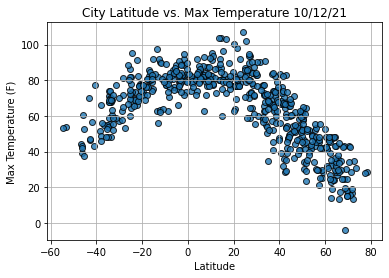

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

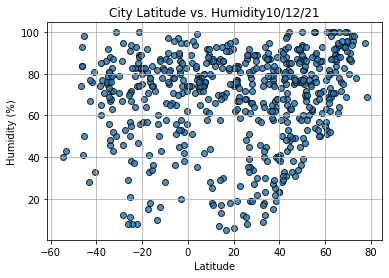

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity"+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

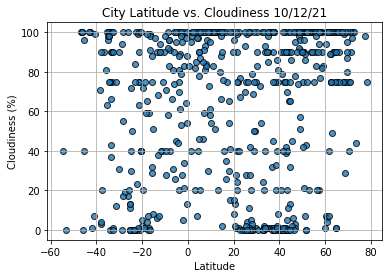

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

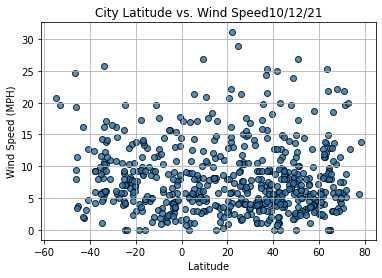

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed"+ time.strftime("%x"))
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-10-12 14:19:31,42.6001,-73.9662,64.54,92,100,1.01
3,Butaritari,KI,2021-10-12 14:20:08,3.0707,172.7902,80.91,71,82,8.90
5,Tulum,MX,2021-10-12 14:20:09,20.2167,-87.4667,82.45,74,8,4.59
8,Vitry-Le-Francois,FR,2021-10-12 14:20:11,48.7333,4.5833,58.06,76,98,10.65
9,Jamestown,US,2021-10-12 14:20:11,42.0970,-79.2353,68.02,77,75,5.99
...,...,...,...,...,...,...,...,...,...
575,Kurchum,KZ,2021-10-12 14:23:20,48.5722,83.6542,41.11,85,100,7.34
576,Awbari,LY,2021-10-12 14:23:20,26.5921,12.7805,79.95,33,100,11.79
577,Prince Rupert,CA,2021-10-12 14:18:39,54.3161,-130.3201,46.09,88,90,2.30
578,Verkhoyansk,RU,2021-10-12 14:23:20,67.5447,133.3850,24.69,96,100,2.82


In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

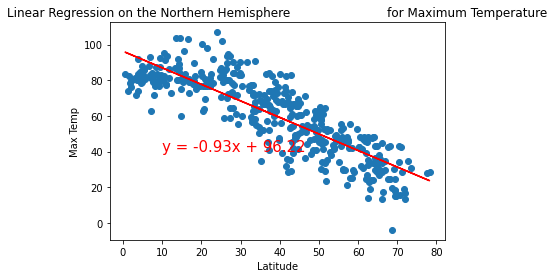

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

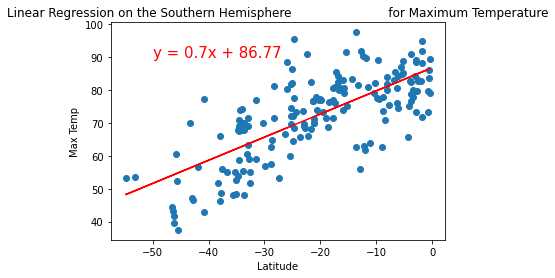

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

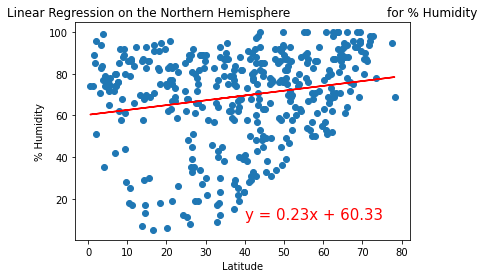

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

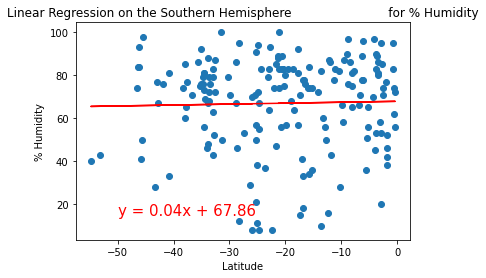

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

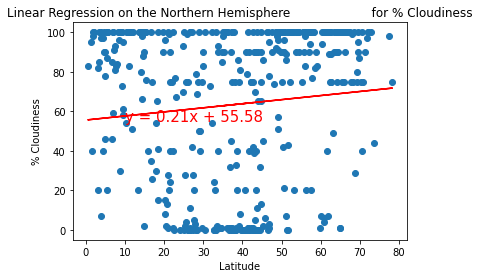

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

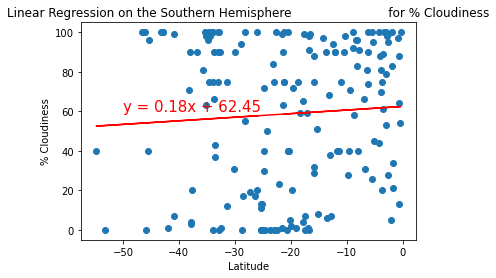

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

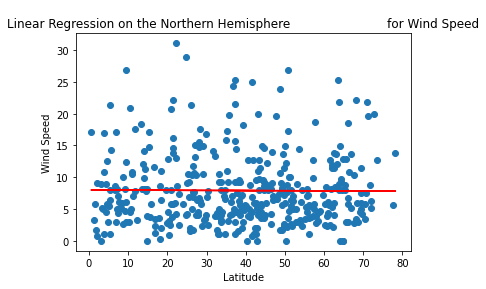

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

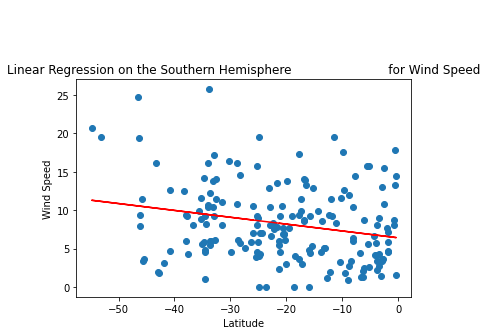

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))